<a href="https://colab.research.google.com/github/yedhukr/Loan-Defaulter-Prediction/blob/master/Loan_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Loading Dataset 

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loan_credit = pd.read_csv('/content/drive/My Drive/Projects/Bank_Lending/XYZLoanData.txt',sep = '\t',na_values = 'NaN',low_memory = False)

## Initial Analysis

### Basics

In [ ]:
loan_df = loan_credit
loan_df.shape

(855969, 73)

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [ ]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [ ]:
loan_df.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [ ]:
loan_df.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
316255,23886200,26258739,24000.0,24000.0,24000.0,36 months,16.99,855.55,D,D3,Clinical Registered Nurse,3 years,OWN,72000.0,Verified,Aug-2014,n,NaN,small_business,Business,841xx,UT,36.41,0.0,Jun-2010,2.0,NaN,NaN,14.0,0.0,7223.0,30.6,18.0,w,14811.09,14811.09,13688.80,13688.80,9188.91,4499.89,0.0,0.0,0.0,Dec-2015,855.55,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,80126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23600.0,NaN,NaN,NaN,0
28198,541531,698956,8500.0,8500.0,8450.0,36 months,6.76,261.53,A,A2,Conneaut Area City Schools,2 years,MORTGAGE,50600.0,Source Verified,Jul-2010,n,Borrower added on 07/07/10 > I have excellen...,major_purchase,volkswagen loan,440xx,OH,15.89,0.0,Oct-1989,0.0,78.0,NaN,16.0,0.0,949.0,8.7,45.0,f,0.00,0.00,9411.36,9356.04,8500.00,911.36,0.0,0.0,0.0,Jul-2013,297.29,NaN,Jul-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
409562,12918646,14950835,4900.0,4900.0,4900.0,36 months,12.99,165.08,B,B5,Owner,5 years,OWN,31824.0,Source Verified,Mar-2014,n,NaN,debt_consolidation,Debt consolidation,972xx,OR,10.97,1.0,Sep-1999,1.0,20.0,NaN,12.0,0.0,6133.0,43.5,25.0,f,0.00,0.00,5472.42,5472.42,4900.00,572.42,0.0,0.0,0.0,May-2015,2972.42,NaN,Jan-2016,0.0,62.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,446.0,6133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN,0


### Row wise null count

In [ ]:
loan_df.isnull().sum(axis=1).sort_values(ascending=False)

14820     28
11269     28
4712      28
218492    27
198345    27
          ..
464502     2
464483     2
460831     2
464659     2
452290     1
Length: 855969, dtype: int64

### Column wise null count

In [ ]:
risky = round((loan_df.isnull().sum()/len(loan_df.index)*100),2)
risky[risky > 40].sort_values(ascending=False)

annual_inc_joint               99.95
dti_joint                      99.95
verification_status_joint      99.95
il_util                        98.64
mths_since_rcnt_il             98.49
inq_last_12m                   98.45
total_cu_tl                    98.45
open_acc_6m                    98.45
open_il_6m                     98.45
open_il_12m                    98.45
open_il_24m                    98.45
total_bal_il                   98.45
open_rv_12m                    98.45
open_rv_24m                    98.45
max_bal_bc                     98.45
all_util                       98.45
inq_fi                         98.45
desc                           85.77
mths_since_last_record         84.67
mths_since_last_major_derog    75.10
mths_since_last_delinq         51.38
dtype: float64

##  Data Cleaning and Data quality issue fixing

### Removing of all unrequired columns based on the data dictionary and columns having null values more than 50%

In [ ]:
loan_df.dropna(axis=1,how='all',inplace=True)
loan_df.shape

(855969, 73)

In [ ]:
loan_df[['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'il_util',
       'mths_since_rcnt_il', 'inq_last_12m', 'total_cu_tl', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'desc', 'mths_since_last_record', 'mths_since_last_major_derog']].sample(3)

,annual_inc_joint,dti_joint,verification_status_joint,il_util,mths_since_rcnt_il,inq_last_12m,total_cu_tl,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,desc,mths_since_last_record,mths_since_last_major_derog
456727,NaN,NaN,NaN,79.8,12.0,3.0,0.0,3.0,2.0,1.0,2.0,46122.0,3.0,5.0,18781.0,62.7,3.0,NaN,NaN,NaN
730518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN


In [ ]:
loan_df = loan_df.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'il_util',
       'mths_since_rcnt_il', 'inq_last_12m', 'total_cu_tl', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'desc', 'mths_since_last_record', 'mths_since_last_major_derog','mths_since_last_delinq',
       'id','member_id','policy_code','zip_code','sub_grade',
       'funded_amnt','funded_amnt_inv','total_pymnt_inv','out_prncp_inv','installment','total_rec_prncp', #highly correlated
       'title','earliest_cr_line','addr_state','emp_title','next_pymnt_d','last_credit_pull_d','last_pymnt_d', #'initial_list_status'(?)
       ],axis=1)

loan_df.sample(5)
# del_df.shape

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
485636,28000.0,36 months,7.26,A,10+ years,MORTGAGE,122000.0,Verified,Dec-2015,n,debt_consolidation,34.63,1.0,1.0,37.0,0.0,67108.0,44.0,71.0,w,27301.50,856.61,158.11,0.0,0.0,0.0,867.90,0.0,INDIVIDUAL,0.0,0.0,346548.0,153100.0,0
600099,15000.0,36 months,11.53,B,7 years,OWN,85000.0,Source Verified,Sep-2015,n,credit_card,21.26,0.0,0.0,11.0,0.0,5254.0,45.7,32.0,w,13576.71,1955.42,532.13,0.0,0.0,0.0,494.86,0.0,INDIVIDUAL,0.0,3431.0,315255.0,11500.0,0
675082,8000.0,36 months,10.99,B,8 years,MORTGAGE,115000.0,Verified,Jul-2015,n,debt_consolidation,16.24,0.0,1.0,15.0,0.0,21736.0,60.4,31.0,f,6842.09,1561.51,403.60,0.0,0.0,0.0,261.88,0.0,INDIVIDUAL,0.0,214.0,239097.0,36000.0,0
768472,27725.0,36 months,9.99,B,10+ years,RENT,120000.0,Source Verified,Apr-2015,n,debt_consolidation,30.14,0.0,0.0,16.0,0.0,25255.0,53.1,46.0,f,21549.16,8034.93,1859.09,0.0,0.0,0.0,894.48,0.0,INDIVIDUAL,0.0,0.0,105516.0,47600.0,0
435077,25725.0,36 months,15.61,C,7 years,MORTGAGE,56031.0,Verified,Feb-2014,n,major_purchase,9.59,0.0,0.0,10.0,0.0,6703.0,65.7,19.0,w,10694.13,20687.81,5656.94,0.0,0.0,0.0,899.47,0.0,INDIVIDUAL,0.0,0.0,12407.0,10200.0,0


In [ ]:
loan_df.columns[(loan_df.isnull().sum()/len(loan_df.index)*100) >2]

Index(['emp_length', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

### Removing of all duplicate values if any

In [ ]:
loan_df=loan_df.drop_duplicates()

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 0 to 855968
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   term                        855969 non-null  object 
 2   int_rate                    855969 non-null  float64
 3   grade                       855969 non-null  object 
 4   emp_length                  812908 non-null  object 
 5   home_ownership              855969 non-null  object 
 6   annual_inc                  855969 non-null  float64
 7   verification_status         855969 non-null  object 
 8   issue_d                     855969 non-null  object 
 9   pymnt_plan                  855969 non-null  object 
 10  purpose                     855969 non-null  object 
 11  dti                         855969 non-null  float64
 12  delinq_2yrs                 855969 non-null  float64
 13  inq_last_6mths

In [ ]:
loan_df.isnull().sum()/len(loan_df.index)*100

loan_amnt                     0.000000
term                          0.000000
int_rate                      0.000000
grade                         0.000000
emp_length                    5.030673
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
pymnt_plan                    0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.052105
total_acc                     0.000000
initial_list_status           0.000000
out_prncp                     0.000000
total_pymnt                   0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee  

### Fixing data quality issue in issue_d 

In [ ]:
# Converting issue_d to datetime column
loan_df.issue_d=pd.to_datetime(loan_df.issue_d)

In [ ]:
loan_df.loc[pd.isnull(loan_df['revol_util']), ['revol_util']]

,revol_util
3563,NaN
4712,NaN
4942,NaN
11269,NaN
12026,NaN
...,...
841406,NaN
851788,NaN
851857,NaN
851923,NaN


In [ ]:
#Train data 
#Date Format{mm-dd-yyyy}

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])

start_date ='06-01-2007'
end_date ='05-01-2015'

mask = (loan_df['issue_d'] > start_date) & (loan_df['issue_d'] <= end_date)

TrainData = loan_df.loc[mask]
TrainData.head(4)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,36 months,10.65,B,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,2500.0,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,2400.0,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,10000.0,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,2209.33,16.97,0.00,0.00,357.48,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [ ]:
#Test Data
#Date Format{yyy-mm-dd}

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])

start_date ='06-06-2015'
end_date ='12-01-2015'

mask = (loan_df['issue_d'] > start_date) & (loan_df['issue_d'] <= end_date)

TestData = loan_df.loc[mask]
TestData.head(4)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
452272,25000.0,36 months,5.32,A,1 year,MORTGAGE,150000.0,Not Verified,2015-12-01,n,credit_card,9.54,0.0,0.0,7.0,0.0,19339.0,42.5,18.0,w,24357.97,682.67,40.64,0.0,0.0,0.0,701.14,0.0,INDIVIDUAL,0.0,0.0,430856.0,45500.0,0
452273,18000.0,60 months,19.48,E,7 years,RENT,150000.0,Not Verified,2015-12-01,n,debt_consolidation,9.39,0.0,1.0,18.0,1.0,14052.0,40.7,27.0,w,17820.50,286.64,107.14,0.0,0.0,0.0,335.34,0.0,INDIVIDUAL,0.0,60.0,36247.0,34500.0,0
452274,7000.0,36 months,7.49,A,10+ years,MORTGAGE,59000.0,Not Verified,2015-12-01,n,credit_card,13.06,1.0,1.0,10.0,0.0,10467.0,24.2,34.0,w,7000.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,INDIVIDUAL,0.0,0.0,55222.0,43200.0,0
452275,20000.0,36 months,17.97,D,7 years,MORTGAGE,180000.0,Not Verified,2015-12-01,n,debt_consolidation,25.10,0.0,0.0,13.0,0.0,59126.0,92.1,30.0,w,20000.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,INDIVIDUAL,0.0,418.0,277227.0,64200.0,0


## EDA


### Univariate Analysis

#### To find the main factors that can be used to predict defaulters. Let us create a new dataset with just data of the  of members of the defaulters

In [ ]:
defaulters = TrainData[TrainData['default_ind']==1]

In [ ]:
defaulters

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
1,2500.0,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.71,435.17,0.0,117.08,1.1100,119.66,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
8,5600.0,60 months,21.28,F,4 years,OWN,40000.0,Source Verified,2011-12-01,n,small_business,5.55,0.0,2.0,11.0,0.0,5210.0,32.6,13.0,f,0.0,646.02,294.94,0.0,189.06,2.0900,152.39,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
9,5375.0,60 months,12.69,B,< 1 year,RENT,15000.0,Verified,2011-12-01,n,other,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,f,0.0,1476.19,533.42,0.0,269.29,2.5200,121.45,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
12,9000.0,36 months,13.49,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.0,2270.70,570.26,0.0,444.30,4.1600,305.38,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
14,10000.0,36 months,10.65,B,3 years,RENT,100000.0,Source Verified,2011-12-01,n,other,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.0,7471.99,1393.42,0.0,645.10,6.3145,325.74,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855896,12000.0,36 months,17.86,D,9 years,RENT,42000.0,Verified,2015-01-01,n,debt_consolidation,26.74,1.0,0.0,7.0,0.0,1294.0,34.1,21.0,w,0.0,3007.12,1144.88,0.0,0.00,0.0000,432.99,0.0,INDIVIDUAL,0.0,0.0,51882.0,3800.0,1
855901,2725.0,36 months,17.86,D,NaN,MORTGAGE,47784.0,Verified,2015-01-01,n,debt_consolidation,14.69,1.0,1.0,10.0,1.0,1963.0,33.8,18.0,f,0.0,590.89,231.68,0.0,0.00,0.0000,98.33,0.0,INDIVIDUAL,0.0,0.0,162837.0,5800.0,1
855922,14000.0,36 months,15.99,D,5 years,MORTGAGE,69000.0,Verified,2015-01-01,n,home_improvement,8.23,0.0,0.0,9.0,0.0,7755.0,64.1,15.0,f,0.0,3420.04,1193.55,0.0,0.00,0.0000,492.13,0.0,INDIVIDUAL,0.0,0.0,22279.0,12100.0,1
855941,4200.0,36 months,15.99,D,10+ years,MORTGAGE,48000.0,Verified,2015-01-01,n,medical,36.93,0.0,0.0,13.0,0.0,12943.0,63.4,45.0,f,0.0,1026.02,358.06,0.0,0.00,0.0000,147.64,0.0,INDIVIDUAL,0.0,0.0,207975.0,20400.0,1


0    552821
1     46156
Name: default_ind, dtype: int64


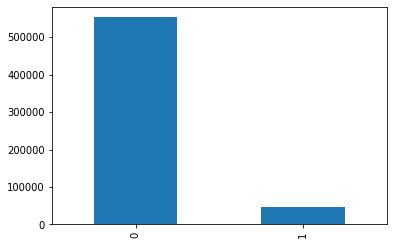

In [ ]:
# Loan Status
default_ind_count = TrainData['default_ind'].value_counts()
print(default_ind_count)
default_ind_count.plot.bar()

AttributeError: ignored

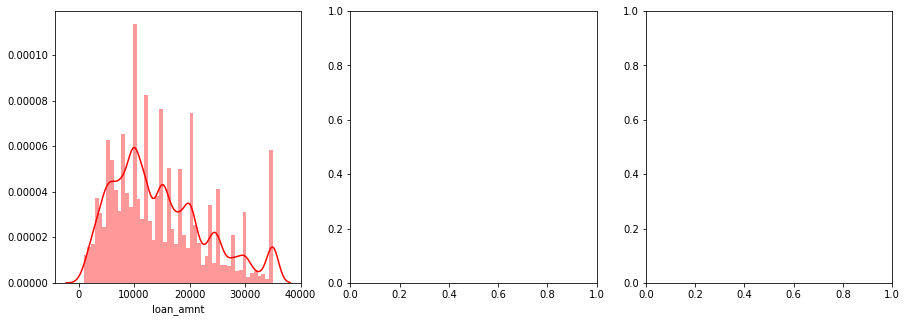

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
sns.distplot(defaulters.loan_amnt,ax=ax1,color='red')
sns.distplot(defaulters.funded_amnt,ax=ax2,color='blue')
sns.distplot(defaulters.funded_amnt_inv,ax=ax3,color='green')

#### In the dataset we have three columns relating to the loans: loan amount, funded amount and total amount from inverstors. The loan amount and funded amount are similarly distributed, which shows that there is an adequate balance between funding and credit.

In [ ]:
defaulters['Year of Issue']=defaulters.issue_d.apply(lambda x:x.year)

In [ ]:
plt.title("Number of Loans issued")
sns.countplot(x='Year of Issue',data=defaulters)

#### We can see the number of defaulters of  loans have increased at a steady rate from the year 2007 to the year 2011 followed by a decrease in the defaulters

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Purpose for loan issued")
plt.yscale('log')
sns.countplot(x='purpose',data=TrainData,hue='default_ind')

#### From the above plot we can observe that most loans approved are for debt consolidation purpose

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Grade of  loan issued")
sns.countplot(x='grade',data=TrainData,hue='default_ind')

#### From the above plot we can observe that grades B,C,D loans are the most defaulted loans

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Employee length for whom loan is issued")
sns.countplot(x='emp_length',data=TrainData,hue='default_ind')

#### From the above plot we can make out that employees with 10+ years of experience are the maximum defaulters of loan

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title("Interest rate of defaulted loans")
plt.yscale('log')
sns.countplot(x='int_range',data=TrainData,hue='default_ind')

#### From the above plot we can make out that loans taken out at an interest of 15-20% are the maximum defaulted loans

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("dti rate of loans of deaulted")
plt.yscale('log')
sns.countplot(x='dti_range',data=TrainData,hue='default_ind')

In [ ]:
TrainData.groupby(by=['dti_range','default_ind'])['id'].count()

#### We can observe that the dti rate  of 15-20% has the maximum loan amount defaulted.

In [ ]:
TrainData['annual_inc'].describe()

In [ ]:
TrainData['annual_inc_charged']=pd.cut(TrainData.annual_inc,10,labels=['0-125K','125-250K','250-375K','375-500K','500-625K','625-750K','750-875K','875-1000K','1000-1125K','1125-1250K'])

In [ ]:
TestData['annual_inc_charged']=pd.cut(TestData.annual_inc,10,labels=['0-125K','125-250K','250-375K','375-500K','500-625K','625-750K','750-875K','875-1000K','1000-1125K','1125-1250K'])

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Annual income of employees that have defaulted on loans")
plt.yscale('log')
sns.countplot(x='annual_inc_charged',data=TrainData,hue='default_ind')

#### We can observe maximum defaulters have an annual income of 0-125K

In [ ]:
# Plotting term  against loan amount 
plt.title("Defaulters based on term of loan")
sns.countplot(x='term',hue='default_ind',data=TrainData)

#### We can observe maximum defaulters have length of their term as 36 months

**bold text**## The driver variables are grade,int_rate,dti,purpose,emp_length,annual_inc,loan_amnt,term

### Bivariate Analysis

In [ ]:
#sns.catplot(x='int_range',y='loan_amnt',data=TrainData,estimator=sum,kind='bar')

#### Here we can observe that as the interest rate is between 10-15% has the maximum defaulters

In [ ]:
#sns.catplot(x='grade',y='loan_amnt',data=charged_off_df,estimator=sum,kind='bar')

#### Here we can observe that when the grade of loan  is  B,C,D has the maximum defaulters

In [ ]:
#charged_off_df['annual_inc_range']=pd.cut(charged_off_df.annual_inc,10,labels=['0-125K','125-250K','250-375K','375-500K','500-625K','625-750K','750-875K','875-1000K','1000-1125K','1125-1250K'])

In [ ]:

#sns.catplot(x='annual_inc_range',y='loan_amnt',data=charged_off_df,estimator=sum,kind='bar',height=15)

#### Annual income below 125K has the most defaulters

In [ ]:
#sns.catplot(x='emp_length',y='loan_amnt',data=charged_off_df,estimator=sum,kind='bar',height=7)

#### Therefore when employee has more than 10+ years experience he/she defaults the most

In [ ]:
#sns.catplot(x='term',y='loan_amnt',hue='loan_status',data=loan_df,height=15,estimator=sum,kind='bar')

#### Therefore term where maximum defaults is 36 months 

### Missing categorical values treatment


In [ ]:
#fill missing categorical values with mode

categ_cols = ['grade', 'home_ownership', 'verification_status']
for col in categ_cols:
    TrainData[col] = TrainData[col].fillna(TrainData[col].mode()[0])
    TestData[col] = TestData[col].fillna(TestData[col].mode()[0])

In [ ]:
#create dataframes with numerical missing values with median imputed 
TrainData = TrainData.fillna(TrainData.median())
TestData = TestData.fillna(TestData.median())

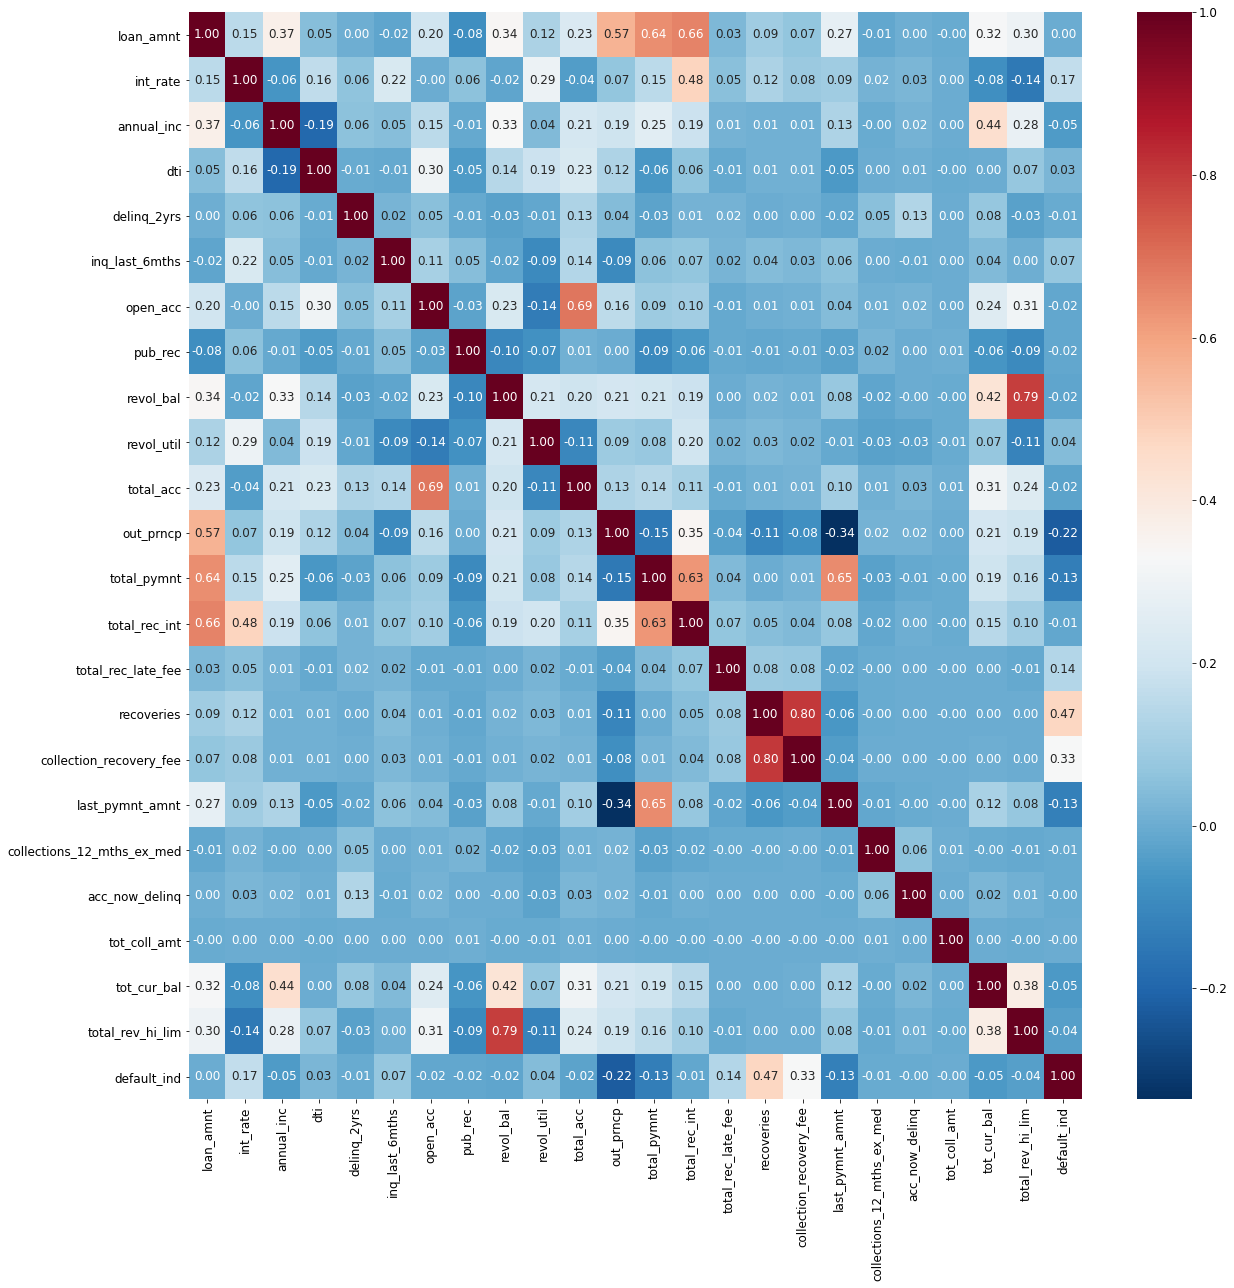

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(TrainData.corr(),annot=True,fmt=".2f",cmap="RdBu_r")

In [ ]:
#Droping the variables with Max and min Corrolation
# del_columns = ["installment","total_pymnt_inv","funded_amnt_inv","funded_amnt","total_pymnt","open_acc","total_acc","member_id"]
# TrainData= TrainData.drop(labels = del_columns,axis = 1)
# TestData= TestData.drop(labels = del_columns,axis = 1)

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(TrainData.corr(),annot=True,fmt=".2f",cmap="RdBu_r")

In [ ]:
TrainData.info()

In [ ]:
TrainData.describe()

In [ ]:
TrainData.sample(3)

## Feature Transformation and Scaling

In [ ]:
TrainData['term_pp'] = TrainData.term.str.split(expand=True).get(0)
TrainData['term_pp'] = TrainData['term_pp'].apply(pd.to_numeric) 

TrainData['emp_length_pp'] = TrainData.emp_length.str.split(expand=True).get(0).str.replace("[+]|[<]", "")
TrainData.dropna(axis=1, how='any')
TrainData['emp_length_pp'] = TrainData['emp_length_pp'].apply(pd.to_numeric) 

TrainData.drop(['term','emp_length'],axis=1,inplace=True)

In [ ]:
TestData['term_pp'] = TestData.term.str.split(expand=True).get(0)
TestData['term_pp'] = TestData['term_pp'].apply(pd.to_numeric) 

TestData['emp_length_pp'] = TestData.emp_length.str.split(expand=True).get(0).str.replace("[+]|[<]", "")
TestData.dropna(axis=1, how='any')
TestData['emp_length_pp'] = TestData['emp_length_pp'].apply(pd.to_numeric) 

TestData.drop(['term','emp_length'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
TrainData['grade_enc'] = labelencoder.fit_transform(TrainData['grade'])
TrainData.drop(['grade'],axis=1,inplace=True)

TestData['grade_enc'] = labelencoder.fit_transform(TestData['grade'])
TestData.drop(['grade'],axis=1,inplace=True)

In [ ]:
filter = TrainData.purpose.value_counts()
filter > 1000

debt_consolidation     True
credit_card            True
home_improvement       True
other                  True
major_purchase         True
small_business         True
car                    True
medical                True
moving                 True
vacation               True
house                  True
wedding                True
renewable_energy      False
educational           False
Name: purpose, dtype: bool

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(TrainData[['home_ownership'
,'verification_status'
,'purpose'
,'application_type']]).toarray())

# merge with main df TrainData on key values
TrainData = TrainData.join(enc_df)
TrainData.sample(3)
TrainData.drop(['home_ownership'
,'verification_status'
,'purpose'
,'application_type'],axis=1,inplace=True)

In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(TestData[['home_ownership'
,'verification_status'
,'purpose'
,'application_type']]).toarray())

# merge with main df TrainData on key values
TestData = TestData.join(enc_df)
TestData.sample(3)
TestData.drop(['home_ownership'
,'verification_status'
,'purpose'
,'application_type'],axis=1,inplace=True)

In [ ]:
TrainData.drop(['pymnt_plan','initial_list_status'],axis=1,inplace=True)
TestData.drop(['pymnt_plan','initial_list_status'],axis=1,inplace=True)
TrainData.dropna(how='any',inplace=True)
TestData.dropna(how='any',inplace=True)

TrainData.sample(5)

,loan_amnt,int_rate,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_pp,emp_length_pp,grade_enc,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
312142,20000.0,6.03,110000.0,2014-08-01,17.62,0.0,0.0,13.0,0.0,26178.0,36.7,21.0,11554.72,9739.52,1294.24,0.0,0.00,0.0000,608.72,0.0,0.0,0.0,256189.0,71300.0,0,36,7.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68978,23000.0,11.99,220000.0,2013-10-01,8.31,0.0,0.0,12.0,0.0,26451.0,57.8,18.0,7234.67,19859.32,4093.99,0.0,0.00,0.0000,763.82,0.0,0.0,0.0,631763.0,45800.0,0,36,10.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
350284,33000.0,14.99,325000.0,2014-07-01,6.99,1.0,0.0,8.0,0.0,40824.0,76.9,25.0,25529.83,14128.20,6658.03,0.0,0.00,0.0000,784.90,0.0,0.0,0.0,649998.0,53100.0,0,60,9.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370337,20000.0,20.20,65000.0,2014-05-01,26.86,0.0,1.0,12.0,0.0,18851.0,60.2,29.0,0.00,6421.90,2285.61,0.0,2697.13,485.4834,532.11,0.0,0.0,0.0,37509.0,31300.0,1,60,10.0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99696,11000.0,21.60,43000.0,2013-08-01,28.27,1.0,0.0,7.0,0.0,3972.0,77.9,18.0,7282.16,8496.04,4778.20,0.0,0.00,0.0000,363.88,0.0,0.0,0.0,45678.0,5100.0,0,60,2.0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
TrainData1 = scaler.fit_transform(TrainData)
TrainData1.sample(5)
# TrainData.info()

## Modelling

### Dummyfication

In [ ]:
catcols=TrainData.select_dtypes(exclude=['int64', 'float64','datetime64[ns]']).columns

In [ ]:
Train_data = pd.get_dummies(TrainData, columns= catcols)
Train_data.sample(3)

,loan_amnt,int_rate,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_pp,emp_length_pp,grade_enc,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
86521,4650.0,14.30,112800.0,2013-09-01,13.73,0.0,4.0,7.0,0.0,154216.0,85.4,25.0,1210.81,4469.08,1029.89,0.0,0.0,0.0,159.61,0.0,0.0,0.0,272513.0,174900.0,0,36,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
228059,24000.0,11.44,67000.0,2014-12-01,15.68,1.0,0.0,7.0,0.0,22958.0,57.7,29.0,19892.34,6821.79,2714.13,0.0,0.0,0.0,527.10,0.0,0.0,0.0,42377.0,39800.0,0,60,10.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426730,9600.0,11.99,131000.0,2014-02-01,14.52,1.0,2.0,17.0,1.0,6218.0,31.6,32.0,4145.77,7014.04,1559.81,0.0,0.0,0.0,318.82,0.0,0.0,0.0,58918.0,19700.0,0,36,10.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Test_data = pd.get_dummies(TestData, columns= catcols)

### Model training

In [ ]:
del_columns = ["default_ind"]
Test_data = Test_data.drop(labels = del_columns,axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
columns = Train_data.drop('default_ind',axis =1).columns
X_train, X_test, y_train, y_test = train_test_split(Train_data[columns], Train_data.default_ind, test_size = .2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models=[]
models.append(("logreg",LogisticRegression(solver='saga')))
models.append(("tree",DecisionTreeClassifier()))
models.append(("forest",RandomForestClassifier(n_estimators=20)))

In [ ]:
seed=7
scoring='accuracy'

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
X_train = X_train.drop('issue_d',axis=1)
X_test = X_test.drop('issue_d',axis=1)

In [ ]:
for name,model in models:
    kfold=KFold(n_splits=5,random_state=seed)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.914923 0.001479
tree 0.994227 0.000402
forest 0.993684 0.000648


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
final_model=LogisticRegression(solver='saga')
final_model.fit(X_train,y_train)
pred=final_model.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9190414986186825
[[62080     1]
 [ 5479   129]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     62081
           1       0.99      0.02      0.04      5608

    accuracy                           0.92     67689
   macro avg       0.96      0.51      0.50     67689
weighted avg       0.92      0.92      0.88     67689



In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(solver="saga",max_iter=1000)

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [ ]:
y_pred_class

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Score?
logreg.score(X_test,y_test)

0.9804251798667435

In [ ]:
# CONFUSION MATRIX
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred_class))

[[62080     1]
 [ 1324  4284]]


In [ ]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[8.71283271e-01, 1.28716729e-01],
       [9.48164821e-01, 5.18351787e-02],
       [9.60035615e-01, 3.99643851e-02],
       [9.98549819e-01, 1.45018139e-03],
       [9.98130521e-01, 1.86947914e-03],
       [9.99475803e-01, 5.24197455e-04],
       [9.99783945e-01, 2.16054891e-04],
       [9.44383958e-01, 5.56160425e-02],
       [8.73379890e-01, 1.26620110e-01],
       [9.97648776e-01, 2.35122364e-03]])

In [ ]:
logreg.classes_

array([0, 1])

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# predict defaulters if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class_new = binarize(np.atleast_2d(y_pred_prob), 0.3)[0]


In [ ]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class_new))

[[61951   130]
 [  559  5049]]


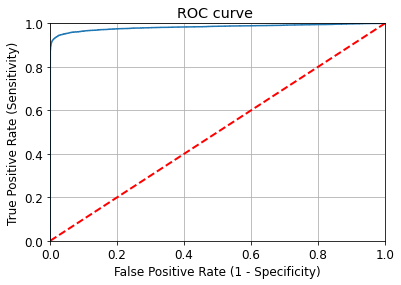

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
# train a logistic regression model on the training set
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9952281759222326


In [ ]:
pred=clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[62080     1]
 [  322  5286]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     62081
           1       1.00      0.94      0.97      5608

    accuracy                           1.00     67689
   macro avg       1.00      0.97      0.98     67689
weighted avg       1.00      1.00      1.00     67689

